In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/netflix_titles_nov_2019.csv")
df.head()

,show_id,title,director,cast,country,month_added,year_added,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NO DATA,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,Nov,19,30-Nov-19,2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NO DATA,Nov,19,30-Nov-19,2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,Nov,19,30-Nov-19,2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",Nov,19,29-Nov-19,2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NO DATA,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",00-00-00,00-00-00,00-00-00,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [ ]:
df.shape

(5837, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      5837 non-null   object
 3   cast          5837 non-null   object
 4   country       5837 non-null   object
 5   month_added   5837 non-null   object
 6   year_added    5837 non-null   object
 7   date_added    5837 non-null   object
 8   release_year  5837 non-null   int64 
 9   rating        5837 non-null   object
 10  duration      5837 non-null   object
 11  listed_in     5837 non-null   object
 12  description   5837 non-null   object
 13  type          5837 non-null   object
dtypes: int64(2), object(12)
memory usage: 638.5+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
show_id,0
title,0
director,0
cast,0
country,0
month_added,0
year_added,0
date_added,0
release_year,0
rating,0


<ipython-input-9-16d1c84b8df1>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




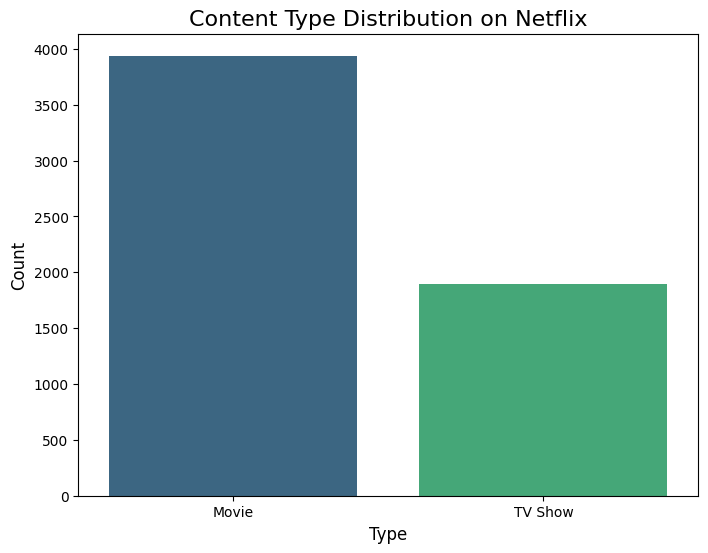

In [ ]:
# Content type counts
type_counts = df['type'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')
plt.title('Content Type Distribution on Netflix', fontsize=16)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


<ipython-input-10-ada20bb67aad>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




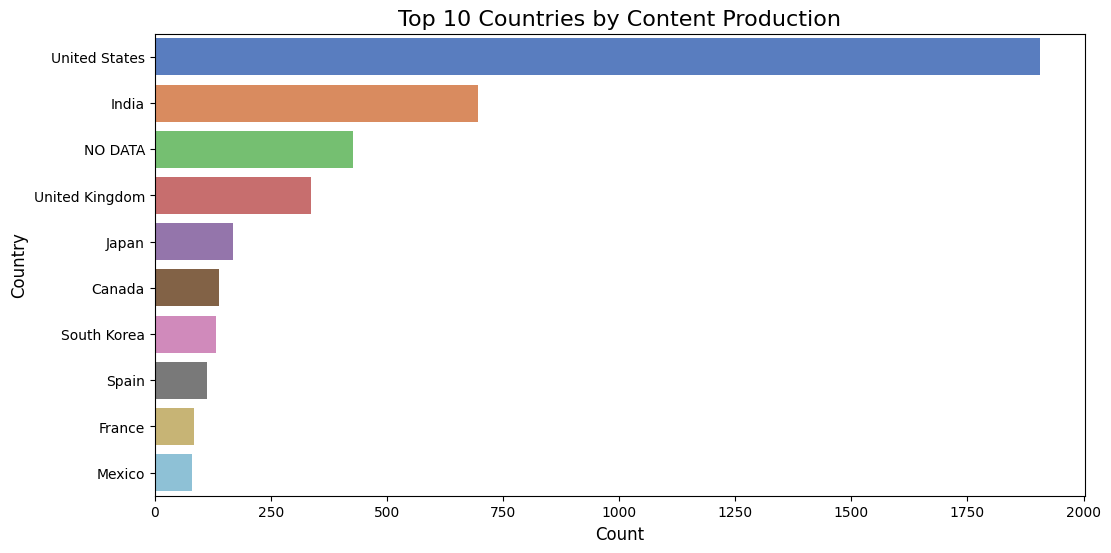

In [ ]:
country_counts = df['country'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='muted')
plt.title('Top 10 Countries by Content Production', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

<ipython-input-11-49a7d17c2cc4>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




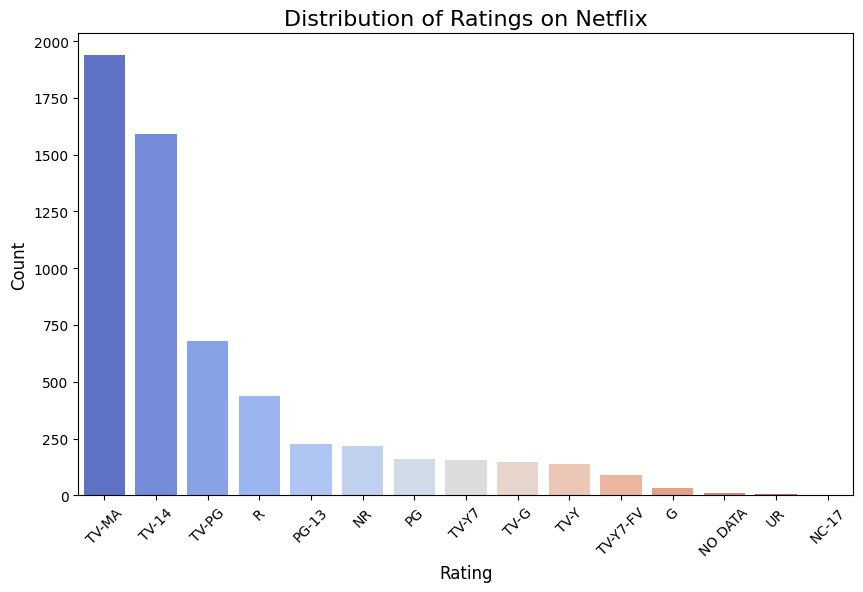

In [ ]:
# Ratings counts
rating_counts = df['rating'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='coolwarm')
plt.title('Distribution of Ratings on Netflix', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


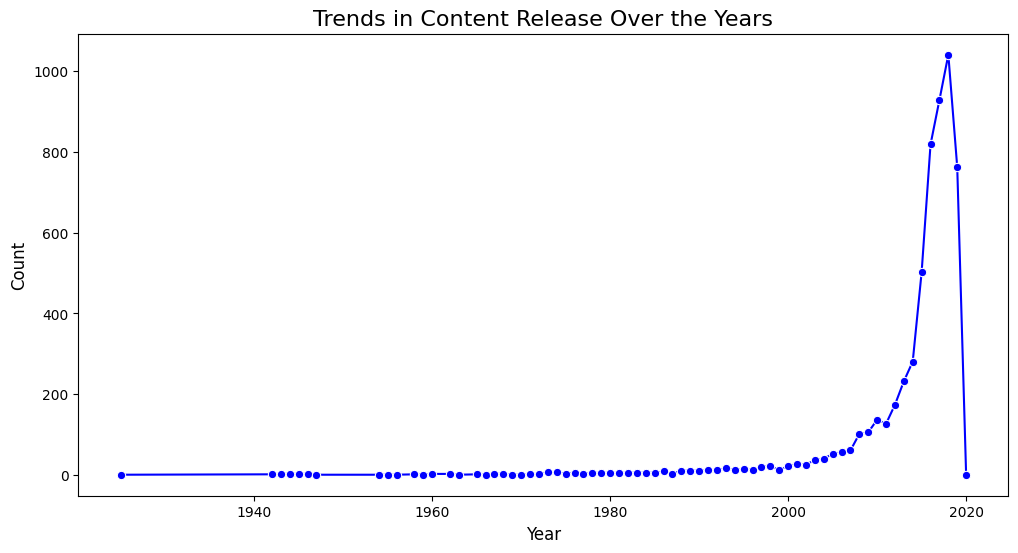

In [ ]:
# Count by release year
release_trends = df['release_year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=release_trends.index, y=release_trends.values, marker='o', color='b')
plt.title('Trends in Content Release Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


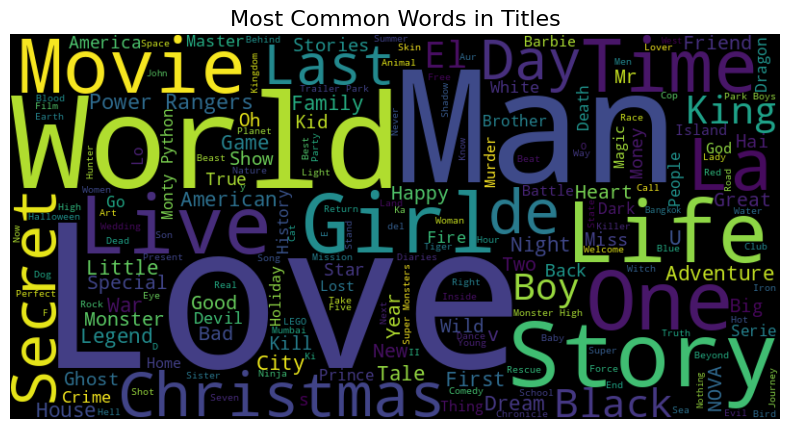

In [ ]:
from wordcloud import WordCloud

# Generate a word cloud for titles
title_text = " ".join(df['title'].dropna().astype(str).tolist())

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(title_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Titles', fontsize=16)
plt.savefig('wordcloud_titles.png')
plt.show()


<ipython-input-16-722d70366313>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




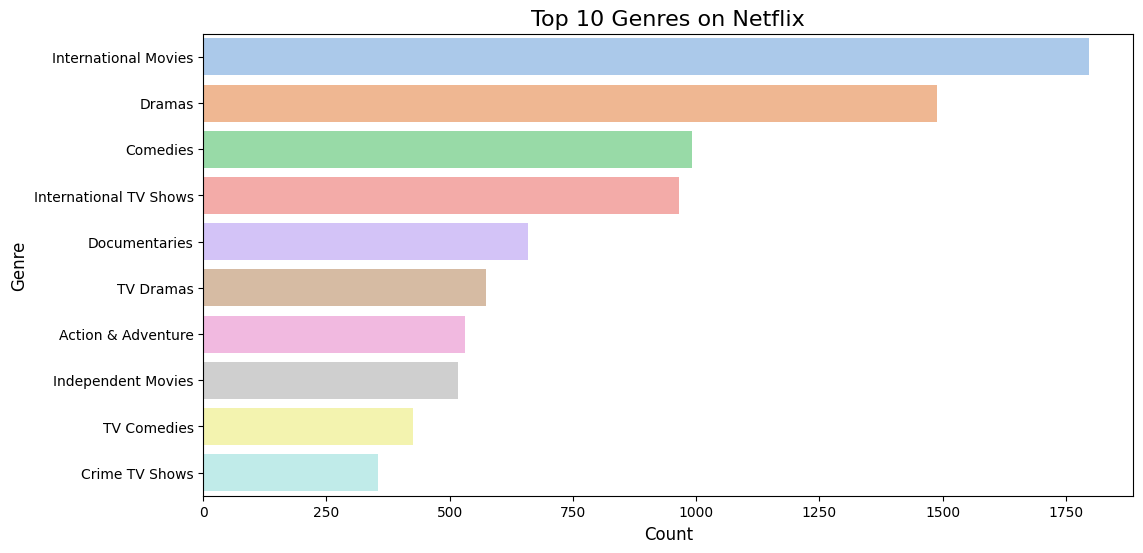

In [ ]:
# Split genres and count occurrences
genres = df['listed_in'].dropna().str.split(',').explode().str.strip()
genre_counts = genres.value_counts()

# Plot top genres
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.head(10).values, y=genre_counts.head(10).index, palette='pastel')
plt.title('Top 10 Genres on Netflix', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.savefig('top_genres.png')
plt.show()


<ipython-input-22-98138c8602ad>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




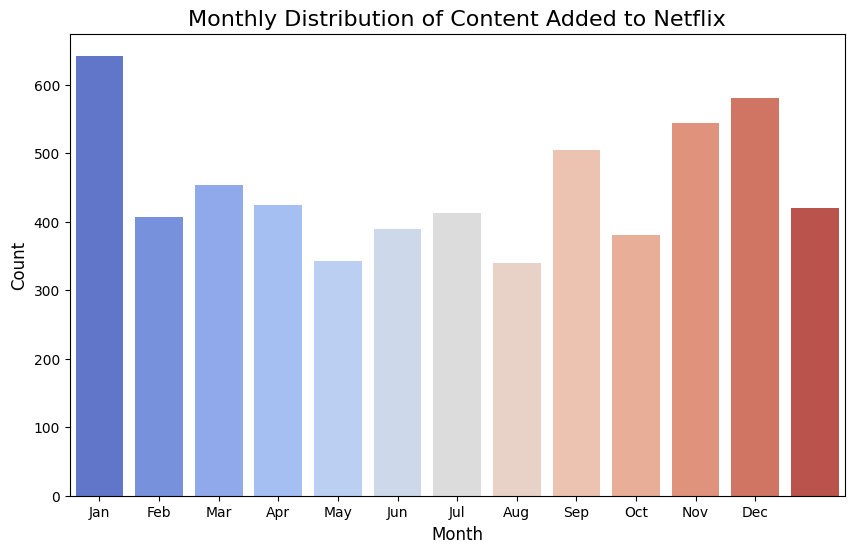

In [ ]:
# Extract month from date_added
#df['month_added'] = df['date_added'].dt.month

# Count by month
monthly_counts = df['month_added'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='coolwarm')
plt.title('Monthly Distribution of Content Added to Netflix', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

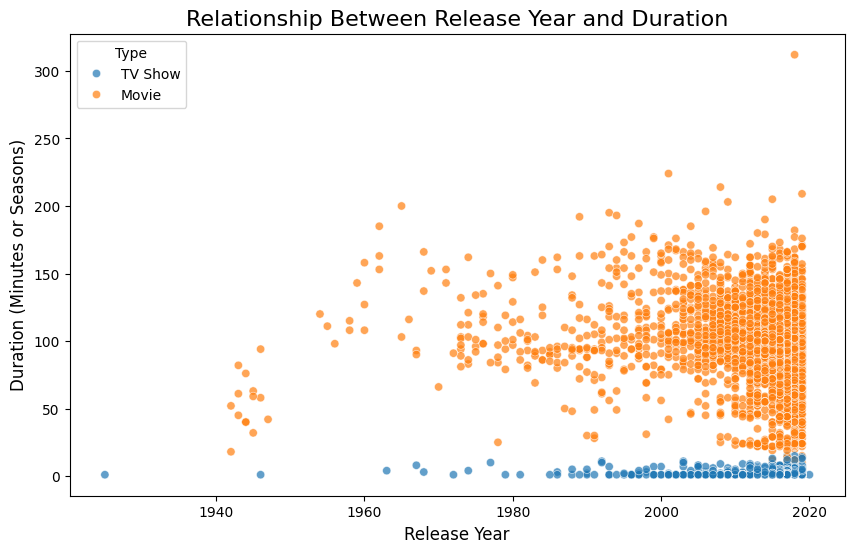

In [ ]:
# Correlation between release year and duration
df['duration_numeric'] = df['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='release_year', y='duration_numeric', hue='type', alpha=0.7)
plt.title('Relationship Between Release Year and Duration', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Duration (Minutes or Seasons)', fontsize=12)
plt.legend(title='Type')
plt.savefig('release_year_vs_duration.png')
plt.show()


In [ ]:
# Prepare data for ML
netflix_ml = df[['type', 'release_year', 'rating', 'duration_numeric']].dropna()
netflix_ml['type_encoded'] = netflix_ml['type'].map({'Movie': 0, 'TV Show': 1})

# Features and labels
X = netflix_ml[['release_year', 'duration_numeric']]
y = netflix_ml['type_encoded']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1166
           1       0.99      1.00      1.00       586

    accuracy                           1.00      1752
   macro avg       1.00      1.00      1.00      1752
weighted avg       1.00      1.00      1.00      1752

